In [51]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# Clustering

This is where we try to find some hidden structure in the pre-processed data. So we load an already prepared file with coded and scaled data.

In [52]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('output_classifiers.csv')
df.drop(['yummy'], axis='columns', inplace=True)

# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            121 non-null    float64
 1   weight           121 non-null    float64
 2   star_rating      121 non-null    float64
 3   total_comments   121 non-null    float64
 4   adult            121 non-null    float64
 5   chicken          121 non-null    float64
 6   wet              121 non-null    float64
 7   from_oceon       121 non-null    float64
 8   salmon           121 non-null    float64
 9   mackerel         121 non-null    float64
 10  can              121 non-null    float64
 11  gravy            121 non-null    float64
 12  vegan            121 non-null    float64
 13  company_farmina  121 non-null    float64
 14  company_me-o     121 non-null    float64
 15  company_meat     121 non-null    float64
 16  company_purepet  121 non-null    float64
 17  company_purina  

## Hierarchical Clustering

Hierarchical clustering is a technique used to group similar data points into clusters in a hierarchical fashion. To perform hierarchical clustering on your dataset "df" using Python, we use the scipy library. 

We compute the linkage matrix using hierarchy.linkage with the 'ward' method. The linkage matrix contains information about how data points are linked during the clustering process.

Next, we create a dendrogram plot using hierarchy.dendrogram, specifying the linkage matrix, labels for your data points (assuming your data points have index labels), orientation, and other plot details.

The resulting dendrogram visually represents how the data points are clustered together based on their similarity.

The recommended number of clusters is 4 or 5.

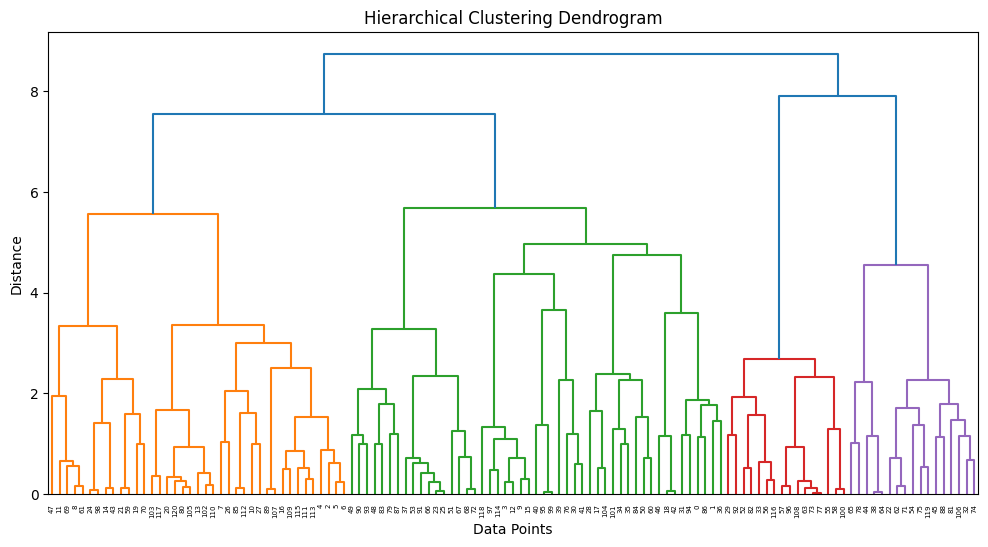

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming you have a DataFrame 'df' with your data

# Calculate the linkage matrix using hierarchical clustering
linkage_matrix = hierarchy.linkage(df, method='ward')  # You can choose a different method if needed

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## K-Means

Performing k-means clustering on a dataset involves grouping data points into 'k' clusters based on their similarity. We use the scikit-learn library in Python to perform k-means clustering. 

We set the number of clusters 'k' to 5. We then initialise the KMeans model with the specified number of clusters and a random seed for reproducibility. The model is fitted to the data using the fit method. 

We obtain the cluster assignments for each data point using kmeans.labels_ and add the cluster labels to the DataFrame.

We can visualise the clusters in 2D ('price'/'weight') using a scatterplot with different colours for each cluster. 

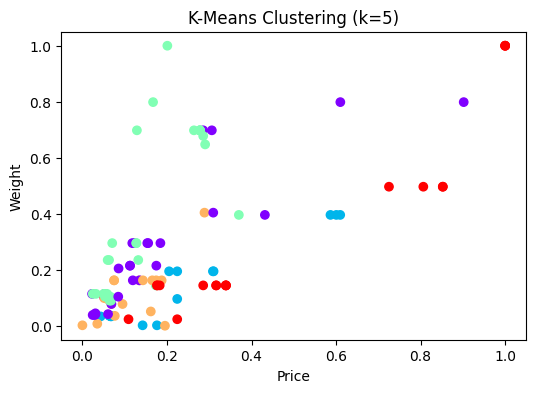

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your data

# Specify the number of clusters (k)
k = 5  # You can choose a different value for k

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(df)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
df['Cluster_kmeans'] = cluster_labels

# Visualize the clusters (for 2D data)
plt.figure(figsize=(6, 4))
plt.scatter(df.price, df.weight, c=cluster_labels, cmap='rainbow')
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

We print centroids to analyse clusters.

In [55]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your data and a 'Cluster' column

# Group the data by the 'Cluster' column and calculate the mean for each cluster
cluster_centroids = df.groupby('Cluster_kmeans').mean().round(3)

# Display the centroids
cluster_centroids

,price,weight,star_rating,total_comments,adult,chicken,wet,from_oceon,salmon,mackerel,...,gravy,vegan,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
Cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.155,0.236,0.753,0.137,0.864,0.182,0.833,0.939,0.091,0.394,...,0.152,0.030,0.000,0.0,0.000,0.061,0.000,0.000,0.000,0.939
1,0.225,0.136,0.668,0.066,0.412,0.235,0.412,0.235,0.000,0.000,...,0.176,0.000,0.000,0.0,0.000,0.000,0.294,0.706,0.000,0.000
2,0.131,0.323,0.646,0.067,0.838,0.059,0.618,0.765,0.176,0.088,...,0.000,0.000,0.029,0.5,0.206,0.118,0.088,0.000,0.059,0.000
3,0.111,0.115,0.618,0.051,0.711,0.947,0.368,0.579,0.158,0.000,...,0.737,0.158,0.000,0.0,0.053,0.158,0.053,0.000,0.368,0.368
4,0.502,0.352,0.744,0.017,0.889,0.333,0.833,0.111,0.111,0.000,...,0.000,0.722,1.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000


We also calculate the number of objects in each cluster.

In [56]:
df['Cluster_kmeans'].value_counts()

2    34
0    33
3    19
4    18
1    17
Name: Cluster_kmeans, dtype: int64

## DBSCAN

To perform DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering, we use scikit-learn in Python.

First we import the necessary modules: DBSCAN for DBSCAN clustering and matplotlib.pyplot for visualisation.

Next, we apply DBSCAN clustering to the sample data using DBSCAN() with specified parameters: eps (maximum distance between two samples for them to be considered in the same neighbourhood) and min_samples (the number of samples in a neighbourhood for a point to be considered a core point).

We use the fit_predict() method to fit the DBSCAN model to the data and obtain the cluster labels for each data point. Then we add the cluster labels to your DataFrame.

Finally, we visualise the clusters using plt.scatter() with different colours representing different clusters. We also add labels and a colour bar for clarity.

Number of clusters: 7
Number of noise points: 75


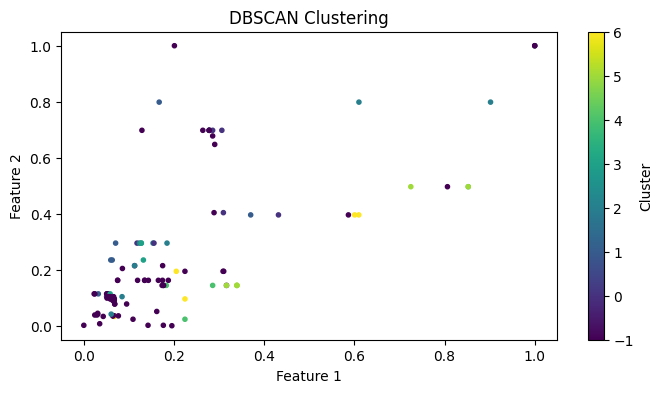

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(df)

# Add the cluster labels to your DataFrame
df['Cluster_dbscan'] = clusters

# Print the number of clusters and noise points (-1 represents noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Plot the clusters
plt.figure(figsize=(8, 4))
plt.scatter(df['price'], df['weight'], c=clusters, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Here we calculate the number of objects in each cluster.

In [58]:
df['Cluster_dbscan'].value_counts()

-1    75
 0     9
 2     9
 1     6
 3     6
 5     6
 6     5
 4     5
Name: Cluster_dbscan, dtype: int64

In [59]:
!jupyter nbconvert 04_Clustering --to html

[NbConvertApp] Converting notebook 04_Clustering.ipynb to html
[NbConvertApp] Writing 711587 bytes to 04_Clustering.html
